This notebook file is for Exploratory Data Analysis of the synthetic CSV. This analysis will help us gather insights of our data before we clean and preprocess it for modelling.



In [16]:
#import req. libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load csv
triage_df = pd.read_csv('../data/synthetic_realistic_er_triage.csv')


In [ ]:
#getting info on columns and their types
print(triage_df.dtypes)

patient_id              int64
age                     int64
sex                    object
arrival_mode           object
chief_complaint        object
consciousness          object
heart_rate            float64
systolic_bp           float64
diastolic_bp          float64
respiratory_rate      float64
temperature           float64
oxygen_saturation     float64
pain_score            float64
triage_level            int64
icu_admission           int64
hospital_admission      int64
critical_event          int64
dtype: object


We see that we have numeric columns:
paitent_id, age, heart_rate, systolic_bp, diastolic_bp, respitory_rate, temperature, oxygen_saturation, pain_score
We also have categorical columns:
triage_level, icu_admission, hospital_admission, critical_event, sex, chief_complaint, consiousness, arrival_mode


In [ ]:
#look at shape of dataset
print(triage_df.shape) #we should see 17 columns and 8000 rows

(8000, 17)


In [8]:
#observe which columns have missing values
print(triage_df.isnull().sum())

patient_id               0
age                      0
sex                      0
arrival_mode             0
chief_complaint          0
consciousness            0
heart_rate               0
systolic_bp              0
diastolic_bp             0
respiratory_rate      3378
temperature            403
oxygen_saturation     2257
pain_score             765
triage_level             0
icu_admission            0
hospital_admission       0
critical_event           0
dtype: int64


We see that 4 columns have quite a few missing values. Reasons for missing values could indicate a case being so serious that a patient's vitals were not recorded in time. We will have to deal with these values when cleaning the data. (imputation or removal)

In [14]:
#basic stats for numeric columns

#age
#temperature
print(f'Min age:', triage_df['age'].min())
print(f'Max age:', triage_df['age'].max())
print(f'Median age:', triage_df['age'].median())
print(f'Average age:', triage_df['age'].mean())
print(f'Q1 age:', triage_df['age'].quantile(0.25))
print(f'Q3 age:', triage_df['age'].quantile(0.75))
print(f'IQR age:', triage_df['age'].quantile(0.75)-triage_df['age'].quantile(0.25))

#heart_rate
print('\n')
print(f'Min heart rate:', triage_df['heart_rate'].min())
print(f'Max heart rate:', triage_df['heart_rate'].max())
print(f'Median heart rate:', triage_df['heart_rate'].median())
print(f'Average heart rate:', triage_df['heart_rate'].mean())
print(f'Q1 heart rate:', triage_df['heart_rate'].quantile(0.25))
print(f'Q3 heart rate:', triage_df['heart_rate'].quantile(0.75))
print(f'IQR heart rate:', triage_df['heart_rate'].quantile(0.75)-triage_df['heart_rate'].quantile(0.25))

#systolic_bp
print('\n')
print(f'Min systolic bp:', triage_df['systolic_bp'].min())
print(f'Max systolic bp:', triage_df['systolic_bp'].max())
print(f'Median systolic bp:', triage_df['systolic_bp'].median())
print(f'Average systolic bp:', triage_df['systolic_bp'].mean())
print(f'Q1 systolic bp:', triage_df['systolic_bp'].quantile(0.25))
print(f'Q3 systolic bp:', triage_df['systolic_bp'].quantile(0.75))
print(f'IQR systolic bp:', triage_df['systolic_bp'].quantile(0.75)-triage_df['systolic_bp'].quantile(0.25))

#diastolic_bp
print('\n')
print(f'Min diastolic bp:', triage_df['diastolic_bp'].min())
print(f'Max diastolic bp:', triage_df['diastolic_bp'].max())
print(f'Median diastolic bp:', triage_df['diastolic_bp'].median())
print(f'Average diastolic bp:', triage_df['diastolic_bp'].mean())
print(f'Q1 diastolic bp:', triage_df['diastolic_bp'].quantile(0.25))
print(f'Q3 diastolic bp:', triage_df['diastolic_bp'].quantile(0.75))
print(f'IQR diastolic bp:', triage_df['diastolic_bp'].quantile(0.75)-triage_df['diastolic_bp'].quantile(0.25))

#respiratory_rate
print('\n')
print(f'Min respiratory rate :', triage_df['respiratory_rate'].min())
print(f'Max respiratory rate:', triage_df['respiratory_rate'].max())
print(f'Median respiratory rate:', triage_df['respiratory_rate'].median())
print(f'Average respiratory rate:', triage_df['respiratory_rate'].mean())
print(f'Q1 respiratory rate:', triage_df['respiratory_rate'].quantile(0.25))
print(f'Q3 respiratory rate:', triage_df['respiratory_rate'].quantile(0.75))
print(f'IQR respiratory rate:', triage_df['respiratory_rate'].quantile(0.75)-triage_df['respiratory_rate'].quantile(0.25))

#temperature
print('\n')
print(f'Min temperature:', triage_df['temperature'].min())
print(f'Max temperature:', triage_df['temperature'].max())
print(f'Median temperature:', triage_df['temperature'].median())
print(f'Average temperature:', triage_df['temperature'].mean())
print(f'Q1 temperature:', triage_df['temperature'].quantile(0.25))
print(f'Q3 temperature:', triage_df['temperature'].quantile(0.75))
print(f'IQR temperature:', triage_df['temperature'].quantile(0.75)-triage_df['temperature'].quantile(0.25))

#oxygen_saturation
print('\n')
print(f'Min oxygen saturation:', triage_df['oxygen_saturation'].min())
print(f'Max oxygen saturation:', triage_df['oxygen_saturation'].max())
print(f'Median oxygen saturation:', triage_df['oxygen_saturation'].median())
print(f'Average oxygen saturation:', triage_df['oxygen_saturation'].mean())
print(f'Q1 oxygen saturation:', triage_df['oxygen_saturation'].quantile(0.25))
print(f'Q3 oxygen saturation:', triage_df['oxygen_saturation'].quantile(0.75))
print(f'IQR oxygen saturation:', triage_df['oxygen_saturation'].quantile(0.75)-triage_df['oxygen_saturation'].quantile(0.25))

#pain_score
print('\n')
print(f'Min pain score:', triage_df['pain_score'].min())
print(f'Max pain score:', triage_df['pain_score'].max())
print(f'Median pain score:', triage_df['pain_score'].median())
print(f'Average pain score:', triage_df['pain_score'].mean())
print(f'Q1 pain score:', triage_df['pain_score'].quantile(0.25))
print(f'Q3 pain score:', triage_df['pain_score'].quantile(0.75))
print(f'IQR pain score:', triage_df['pain_score'].quantile(0.75)-triage_df['pain_score'].quantile(0.25))


Min age: 0
Max age: 94
Median age: 47.0
Average age: 46.704375
Q1 age: 23.0
Q3 age: 70.0
IQR age: 47.0


Min heart rate: 34.37811747094344
Max heart rate: 169.64975965501773
Median heart rate: 92.5642370915709
Average heart rate: 92.94492755112084
Q1 heart rate: 80.57058939346821
Q3 heart rate: 105.04852504788346
IQR heart rate: 24.477935654415248


Min systolic bp: 65.0
Max systolic bp: 195.0
Median systolic bp: 125.0
Average systolic bp: 122.91875
Q1 systolic bp: 110.0
Q3 systolic bp: 135.0
IQR systolic bp: 25.0


Min diastolic bp: 40.0
Max diastolic bp: 125.0
Median diastolic bp: 80.0
Average diastolic bp: 79.94375
Q1 diastolic bp: 70.0
Q3 diastolic bp: 90.0
IQR diastolic bp: 20.0


Min respiratory rate : 8.0
Max respiratory rate: 45.0
Median respiratory rate: 22.0
Average respiratory rate: 22.933145824318476
Q1 respiratory rate: 17.0
Q3 respiratory rate: 28.0
IQR respiratory rate: 11.0


Min temperature: 34.3
Max temperature: 41.0
Median temperature: 36.9
Average temperature: 37.08

General Observations of numeric data: numeric vitals are realistic and include edge cases

<function matplotlib.pyplot.show(close=None, block=None)>

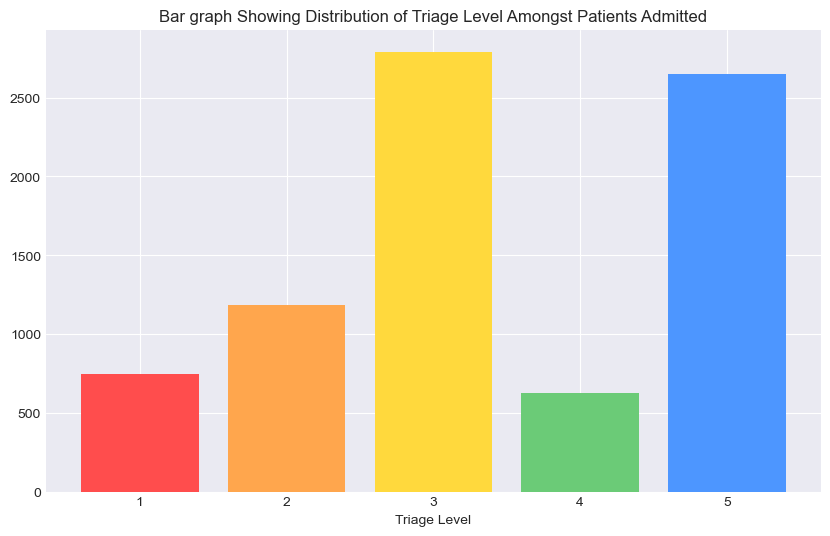

In [34]:
# visualization of distribution of triage level

triage_counts = triage_df['triage_level'].value_counts().sort_index()
triage_colours = {
    1: '#FF4D4D', 2:'#FFA64D', 3:'#FFD93D', 4:'#6BCB77', 5:'#4D96FF'
}
bar_colours = [triage_colours.get(level, 'gray') for level in triage_counts.index]
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-darkgrid')
plt.bar(triage_counts.index, triage_counts.values, color=bar_colours)
plt.xlabel('Triage Level')
plt.title('Bar graph Showing Distribution of Triage Level Amongst Patients Admitted')
plt.show

Observation: Triage Level 1 is quiet low as expected. Triage 3 is the highest which matches real life norms.